# Milestone #3 #


***Basic Information***

CS-109a

***Team-members:***

Timur Zambalayev and Joshua Coffie

***Submitted on November 5, 2016***

# Background - Project Summary


Using a movie-ratings based dataset, we will analyze the data, build a baseline model to explain the data, and implement a recommendation technique for future use.

Throughout this process,  we'll explore:

★ What are the features that makes movies popular?

★ Can we predict sentiments of reviews?

★ Can we predict user preferences?


<b>Data Exploration and Cleaning:</b>

We will perform the following exploration steps:

❖ Decide on a suitable database to store the data [Complete]

❖ Decide on a computing resource to process the data (AWS, Microsoft Azure, personal computer).

❖ Perform Feature Extraction/Selection (where can you get other features?)

❖ Remove/Clean records with spurious entries (e.g. null values, unmatched titles,
etc)

❖ Visualize popularity of different genres.

❖ Check for any correlations between features.


<b>Implement Baselines + Recommender:</b>

● Decide on the performance metric to evaluate prediction.

● Implement the following technique(s):

○ Simple averaging: Predict user ratings of items based on user and item preferences

○ ContentBased Recommendations: Model user + item attributes and interactions with utility matrix

○ Collaborative Filtering: Recommend items based on similarity measures between users and/or items.

○ Other models such as linear regression


# Milestone 3

This is the Data Exploration phase.

1. Collect the relevant data and

2. Submit a document with 10-12 visuals and 1 to 2 page write-up of key findings. Some summary measures should be submitted as well; be smart to only include what helps you explain what has been noticed.

In [43]:
#Importing packages

import operator
from collections import defaultdict, namedtuple, Counter
from datetime import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

%matplotlib inline

# Part 1

Collecting the data and importing into Jupyter Notebook for visualization

In [33]:
##Creating functions to import that data and return basic facts

Dataset = namedtuple('Dataset', ['ratings_df', 'movies_df', 'tags_df', 'links_df'])


def date_parse(time_in_secs):
    return datetime.fromtimestamp(float(time_in_secs))


def read_data():
    ratings_df = pd.read_csv('ml-latest-small/ratings.csv', parse_dates=['timestamp'], date_parser=date_parse)
    movies_df = pd.read_csv('ml-latest-small/movies.csv')
    tags_df = pd.read_csv('ml-latest-small/tags.csv', parse_dates=['timestamp'], date_parser=date_parse)
    links_df = pd.read_csv('ml-latest-small/links.csv')
    return Dataset(ratings_df, movies_df, tags_df, links_df)


def explore_data(dataset):
    ratings_df = dataset.ratings_df
    movies_df = dataset.movies_df
    tags_df = dataset.tags_df
    links_df = dataset.links_df

    merged_movies_df = movies_df.merge(links_df)
    merged_ratings_df = ratings_df.merge(merged_movies_df)
    merged_tags_df = tags_df.merge(merged_movies_df)

    print 'raw ratings data:'
    display(ratings_df.head())
    print

    print 'raw movies data:'
    display(movies_df.head())
    print

    print 'raw tags data:'
    display(tags_df.head())
    print

    print 'raw links data:'
    display(links_df.head())
    print

    print 'merged movies data:'
    display(merged_movies_df.head())
    print

    print 'merged ratings data:'
    display(merged_ratings_df.head())
    print

    print 'merged tags data:'
    display(merged_tags_df.head())
    print

    
dataset = read_data()

explore_data(dataset)

raw ratings data:


,userId,movieId,rating,timestamp
0,1,31,2.5,2009-12-13 21:52:24
1,1,1029,3.0,2009-12-13 21:52:59
2,1,1061,3.0,2009-12-13 21:53:02
3,1,1129,2.0,2009-12-13 21:53:05
4,1,1172,4.0,2009-12-13 21:53:25



raw movies data:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy



raw tags data:


,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,2006-01-29 07:29:30
1,15,1955,dentist,2007-10-26 17:44:21
2,15,7478,Cambodia,2007-02-03 22:49:57
3,15,32892,Russian,2007-02-04 16:59:26
4,15,34162,forgettable,2006-03-03 08:16:05



raw links data:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0



merged movies data:


,movieId,title,genres,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0



merged ratings data:


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,31,2.5,2009-12-13 21:52:24,Dangerous Minds (1995),Drama,112792,9909.0
1,7,31,3.0,1996-12-29 09:12:30,Dangerous Minds (1995),Drama,112792,9909.0
2,31,31,4.0,2010-05-10 21:39:13,Dangerous Minds (1995),Drama,112792,9909.0
3,32,31,4.0,1996-06-15 04:47:20,Dangerous Minds (1995),Drama,112792,9909.0
4,36,31,3.0,1996-11-03 16:40:02,Dangerous Minds (1995),Drama,112792,9909.0



merged tags data:


,userId,movieId,tag,timestamp,title,genres,imdbId,tmdbId
0,15,339,sandra 'boring' bullock,2006-01-29 07:29:30,While You Were Sleeping (1995),Comedy|Romance,114924,2064.0
1,15,1955,dentist,2007-10-26 17:44:21,Kramer vs. Kramer (1979),Drama,79417,12102.0
2,15,7478,Cambodia,2007-02-03 22:49:57,Swimming to Cambodia (1987),Drama,94089,42015.0
3,15,32892,Russian,2007-02-04 16:59:26,Ivan's Childhood (a.k.a. My Name is Ivan) (Iva...,Drama|War,56111,31442.0
4,15,34162,forgettable,2006-03-03 08:16:05,Wedding Crashers (2005),Comedy|Romance,396269,9522.0


How many ratings? 100,004
How many users? 671
How many movies? 9,125
How many unique ratings? 10
Unique rating values: [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
Overall ratings mean: 3.54


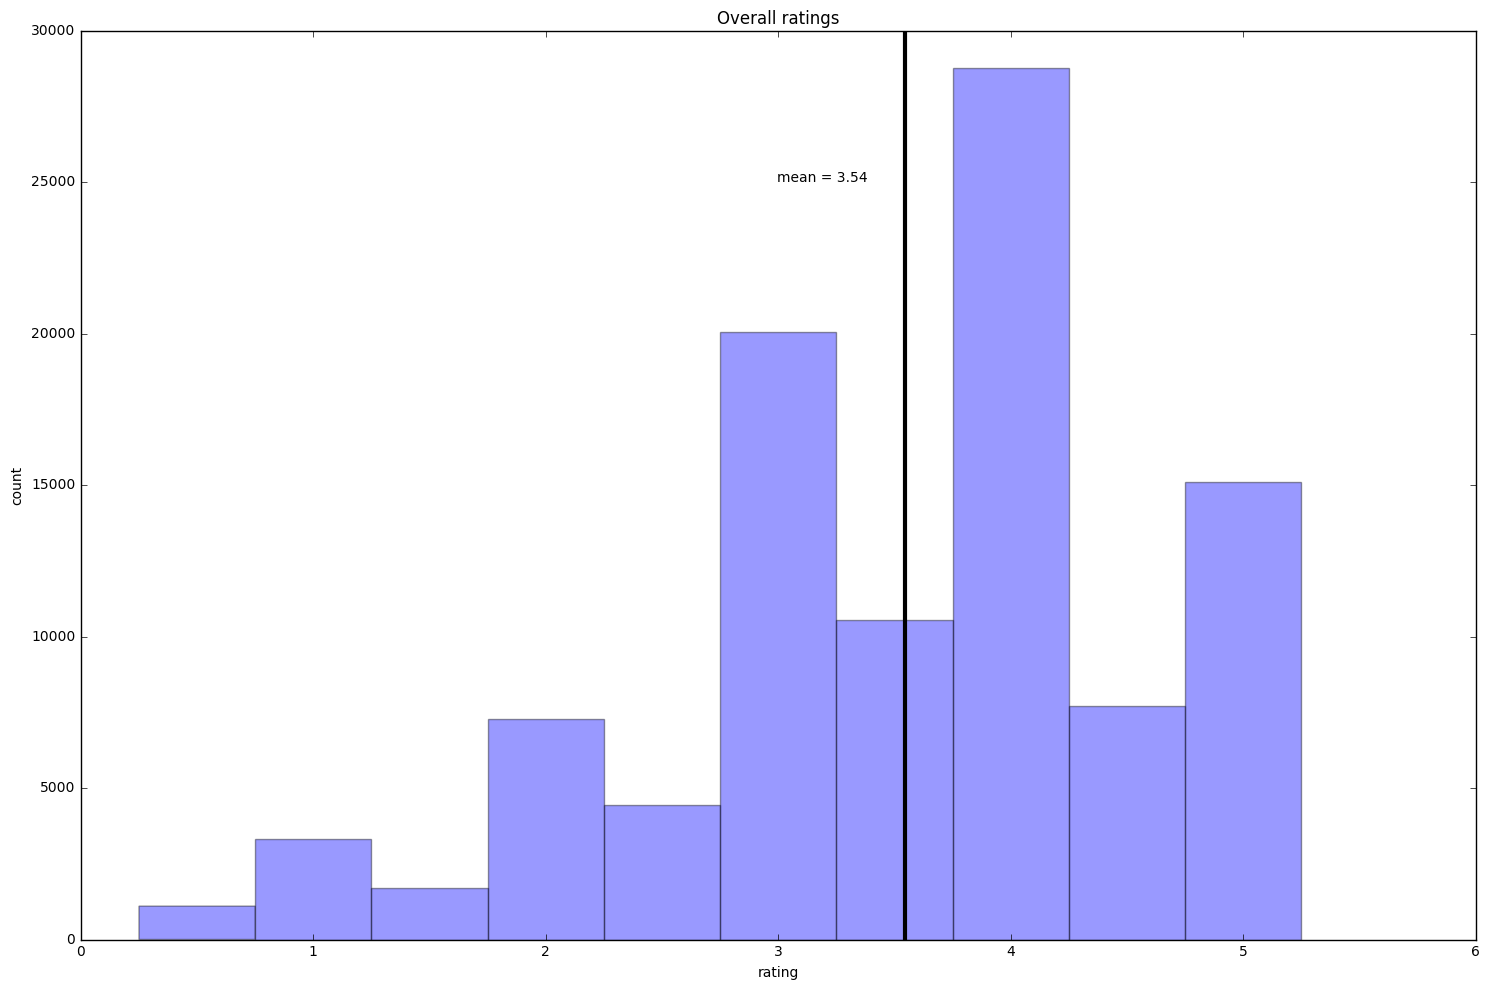

In [23]:
def get_fig_size():
    return 15, 10


def show_ratings_histogram(ratings):
    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(ratings, bins=np.arange(0.25, 5.5, step=0.5), alpha=0.4)

    ratings_mean = ratings.mean()

    ax.axvline(x=ratings_mean, linewidth=3, color='k')
    plt.text(ratings_mean - 0.55, 25000, 'mean = %.2f' % ratings_mean)

    ax.set_xlabel('rating')
    ax.set_ylabel('count')
    ax.set_title('Overall ratings')

    plt.tight_layout()
    plt.show()


def explore_basic_stats(dataset):
    ratings_df = dataset.ratings_df
    movies_df = dataset.movies_df

    user_ids = ratings_df['userId']
    ratings = ratings_df['rating']

    print 'How many ratings? {:,}'.format(len(ratings_df))

    user_id_counter = Counter(user_ids)

    print 'How many users?', len(user_id_counter)
    print 'How many movies? {:,}'.format(len(movies_df))

    ratings_counter = Counter(ratings)

    print 'How many unique ratings?', len(ratings_counter.keys())
    print 'Unique rating values:', sorted(ratings_counter.keys())
    print 'Overall ratings mean: {:.2f}'.format(ratings.mean())

    show_ratings_histogram(ratings)

    
dataset = read_data()

explore_basic_stats(dataset)

***Analysis***

We can use the closest value to the mean (3.5, or rather, 3.5/5.0) as our simplest (naive) baseline prediction.  This mean will be used to sanity check our models in the future and also provides the simplest point of analysis for the dataset.  On the whole, the average rating for a movie is about 3.5.  We should keep in mind, however, that whole number reviews are given to movies, which is visually representative in this histogram.  So we will want to explore the distribution of ratings per movie as well, to get a sense of whether a single review might have an impact on the average rating we see.

Also of note, we see that we're analyzing just over 100,000 ratings from 671 users on 9,100 movies.  So on the whole, we should be looking at around 10 reviews per movie.

# Part 2 - Continued Analysis

In this part, we'll specifically explore:

1. The number of ratings submitted per user
2. The mean of user ratings (x/5.0, for instance)
3. The number of ratings per movie
4. ...

The maximum number of ratings per user: 2391
The mean number of ratings per user: 149.04
The minimum number of ratings per user: 20


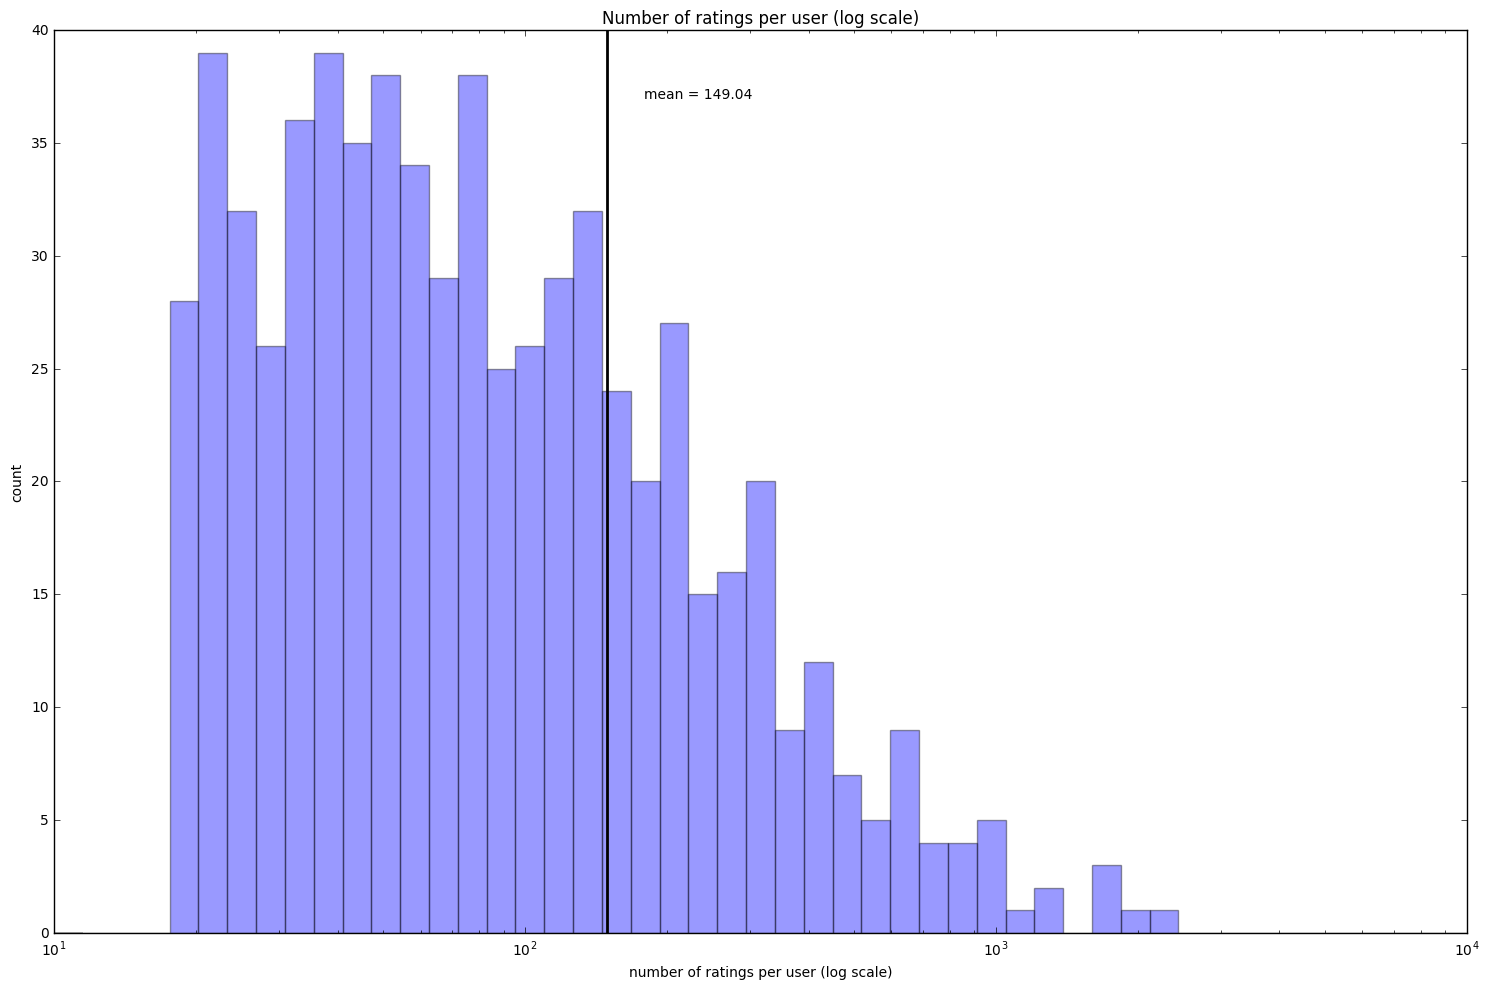

In [15]:
def explore_num_ratings_per_user(dataset):
    ratings_df = dataset.ratings_df
    user_ids = ratings_df['userId']

    user_id_counter = Counter(user_ids)
    num_ratings_per_user = user_id_counter.values()

    mean = np.mean(num_ratings_per_user)
    print 'The maximum number of ratings per user: %.0f' % np.max(num_ratings_per_user)
    print 'The mean number of ratings per user: %.2f' % mean
    print 'The minimum number of ratings per user: %.0f' % np.min(num_ratings_per_user)

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(num_ratings_per_user, bins=np.logspace(1, 4, num=50), alpha=0.4)

    ax.axvline(x=mean, linewidth=2, color='k')
    plt.text(mean + 30, 37, 'mean = %.2f' % mean)

    ax.set_xscale('log')
    ax.set_xlabel('number of ratings per user (log scale)')
    ax.set_ylabel('count')
    ax.set_title('Number of ratings per user (log scale)')

    plt.tight_layout()
    plt.show()

    
explore_num_ratings_per_user(dataset)

Analysis here.

The maximum user mean rating: 4.95
The mean user mean rating: 3.66
The minimum user mean rating: 1.33


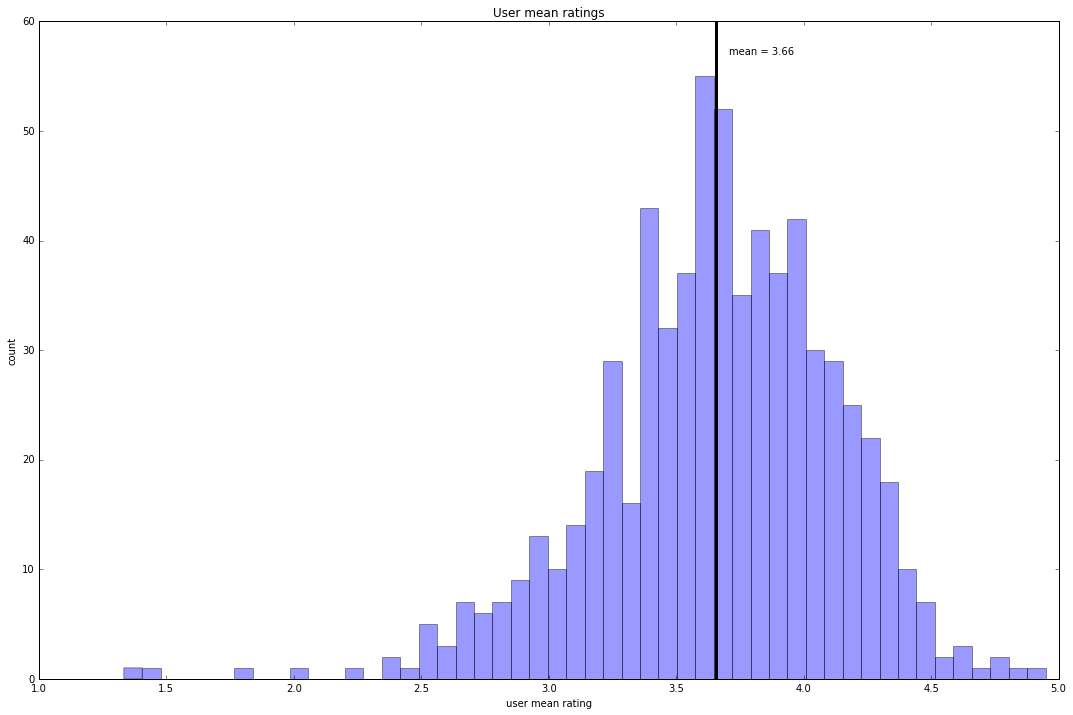

In [4]:
def explore_user_mean_ratings(dataset):
    ratings_df = dataset.ratings_df

    user_ratings = ratings_df.groupby('userId')['rating'].mean()

    print 'The maximum user mean rating: %.2f' % user_ratings.max()
    user_ratings_mean = user_ratings.mean()
    print 'The mean user mean rating: %.2f' % user_ratings_mean
    print 'The minimum user mean rating: %.2f' % user_ratings.min()

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(user_ratings, bins=50, alpha=0.4)

    ax.axvline(x=user_ratings_mean, linewidth=3, color='k')
    plt.text(user_ratings_mean + 0.05, 57, 'mean = %.2f' % user_ratings_mean)

    ax.set_xlabel('user mean rating')
    ax.set_ylabel('count')
    ax.set_title('User mean ratings')

    plt.tight_layout()
    plt.show()

    
explore_user_mean_ratings(dataset)

Analysis here.

The maximum number of ratings per movie: 341
The mean number of ratings per movie: 11.03
The minimum number of ratings per movie: 1
Number of movies with one rating: 3,063
Number of movies with two ratings: 1,202


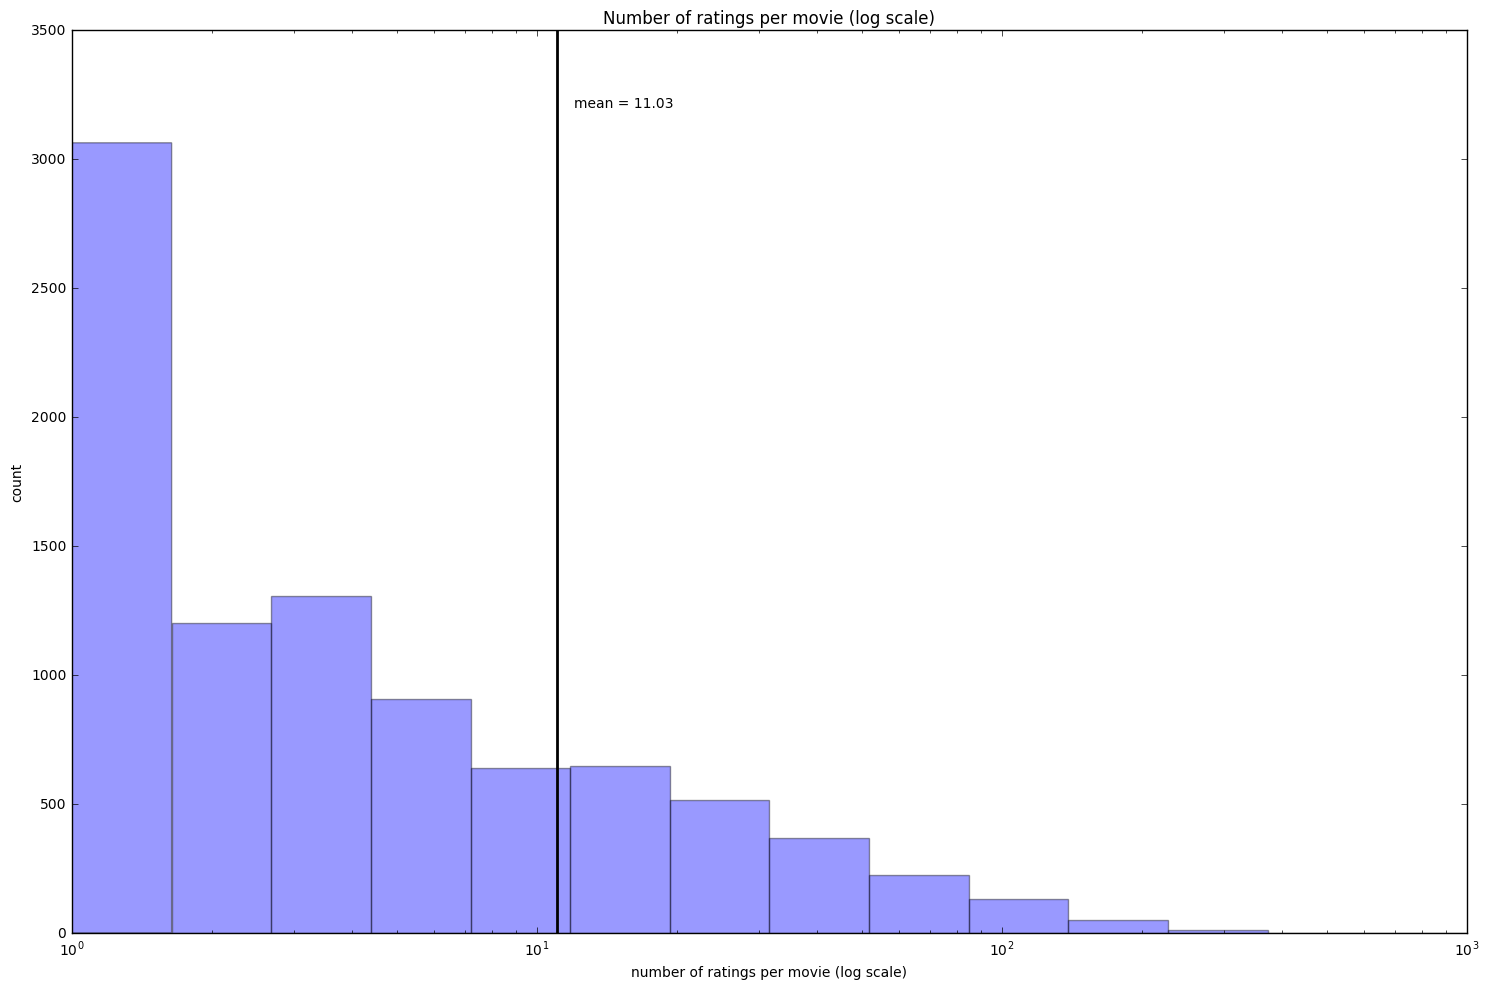

In [16]:
def explore_num_ratings_per_movie(dataset):
    ratings_df = dataset.ratings_df
    movie_ids = ratings_df['movieId']

    movie_id_counter = Counter(movie_ids)
    num_ratings_per_movie = movie_id_counter.values()

    mean = np.mean(num_ratings_per_movie)
    print 'The maximum number of ratings per movie: %.0f' % np.max(num_ratings_per_movie)
    print 'The mean number of ratings per movie: %.2f' % mean
    print 'The minimum number of ratings per movie: %.0f' % np.min(num_ratings_per_movie)

    num_ratings_per_movie_counter = Counter(num_ratings_per_movie)

    print 'Number of movies with one rating: {:,}'.format(num_ratings_per_movie_counter[1])
    print 'Number of movies with two ratings: {:,}'.format(num_ratings_per_movie_counter[2])

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(num_ratings_per_movie, bins=np.logspace(0.0, 3.0, num=15), alpha=0.4)

    ax.axvline(x=mean, linewidth=2, color='k')
    plt.text(mean + 1, 3200, 'mean = %.2f' % mean)

    ax.set_xscale('log')
    ax.set_xlabel('number of ratings per movie (log scale)')
    ax.set_ylabel('count')
    ax.set_title('Number of ratings per movie (log scale)')

    plt.tight_layout()
    plt.show()

    
explore_num_ratings_per_movie(dataset)

Here we can notice that the majority of the movies don't have many ratings. About the third of the movies (3,063) has only one rating. We could try to cluster the movies into larger groups (e.g. by genre).

Analysis here.

The maximum movie mean rating: 5.00
The mean movie mean rating: 3.29
The minimum movie mean rating: 0.50


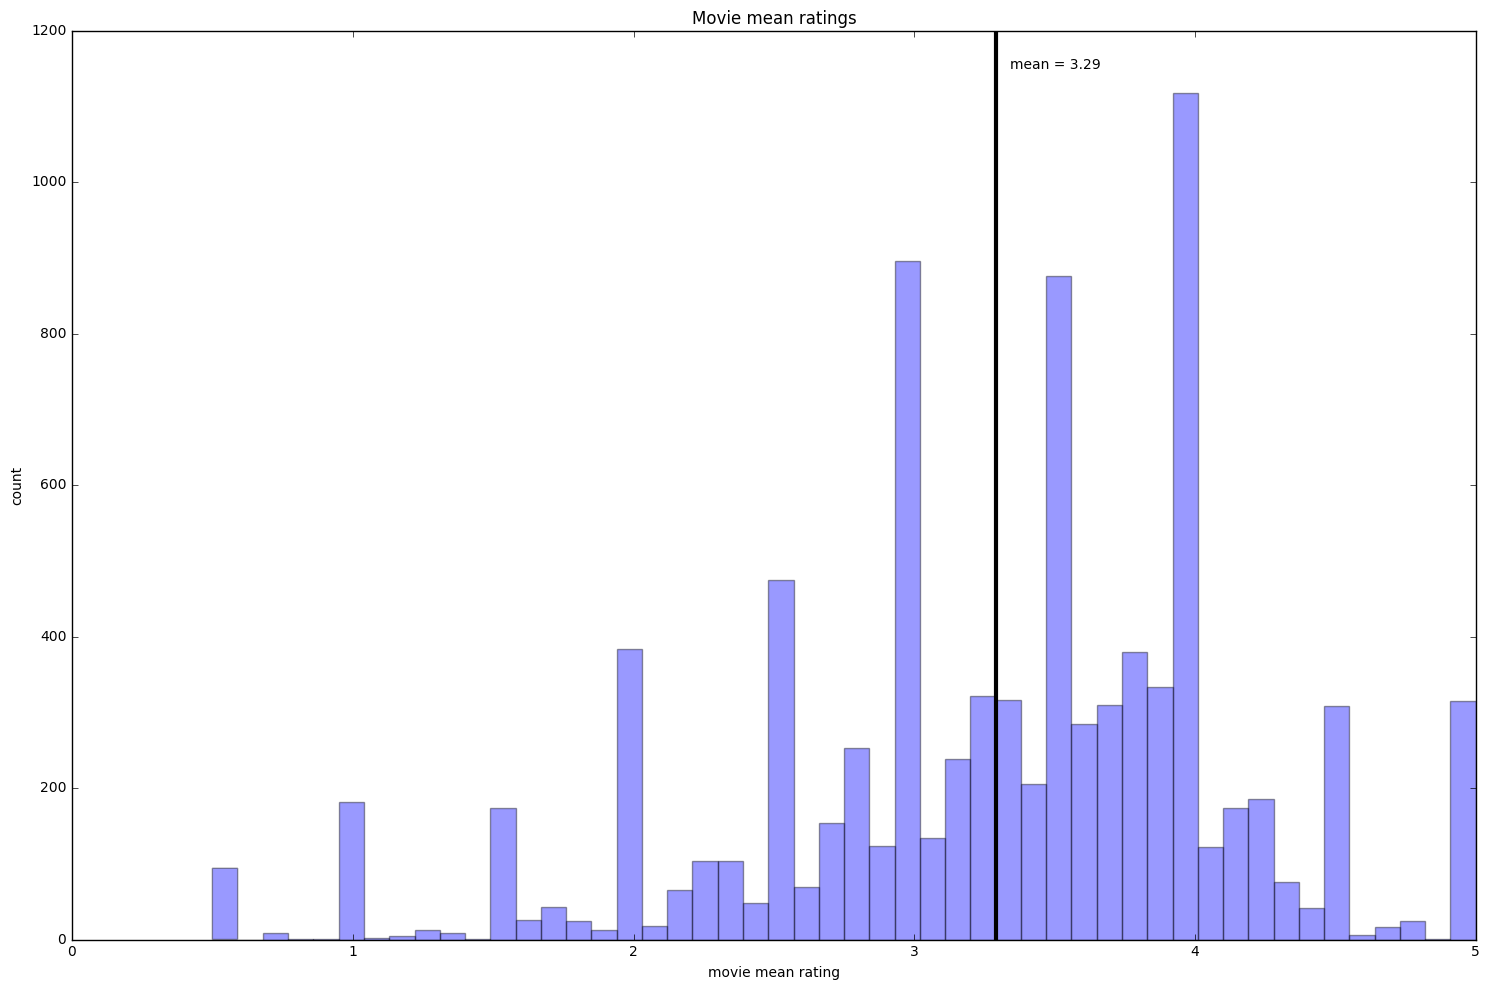

In [11]:
def explore_movie_mean_ratings(dataset):
    ratings_df = dataset.ratings_df

    movie_ratings = ratings_df.groupby('movieId')['rating']

    movie_mean_ratings = movie_ratings.mean()

    print 'The maximum movie mean rating: %.2f' % movie_mean_ratings.max()
    movie_ratings_mean = movie_mean_ratings.mean()
    print 'The mean movie mean rating: %.2f' % movie_ratings_mean
    print 'The minimum movie mean rating: %.2f' % movie_mean_ratings.min()

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(movie_mean_ratings, bins=50, alpha=0.4)

    ax.axvline(x=movie_ratings_mean, linewidth=3, color='k')
    plt.text(movie_ratings_mean + 0.05, 1150, 'mean = %.2f' % movie_ratings_mean)

    ax.set_xlabel('movie mean rating')
    ax.set_ylabel('count')
    ax.set_title('Movie mean ratings')

    plt.tight_layout()
    plt.show()

    
explore_movie_mean_ratings(dataset)

We can notice the spikes for 0.5, 1.0, 2.0, etc values. It's because we have a lot of movies with just one rating.

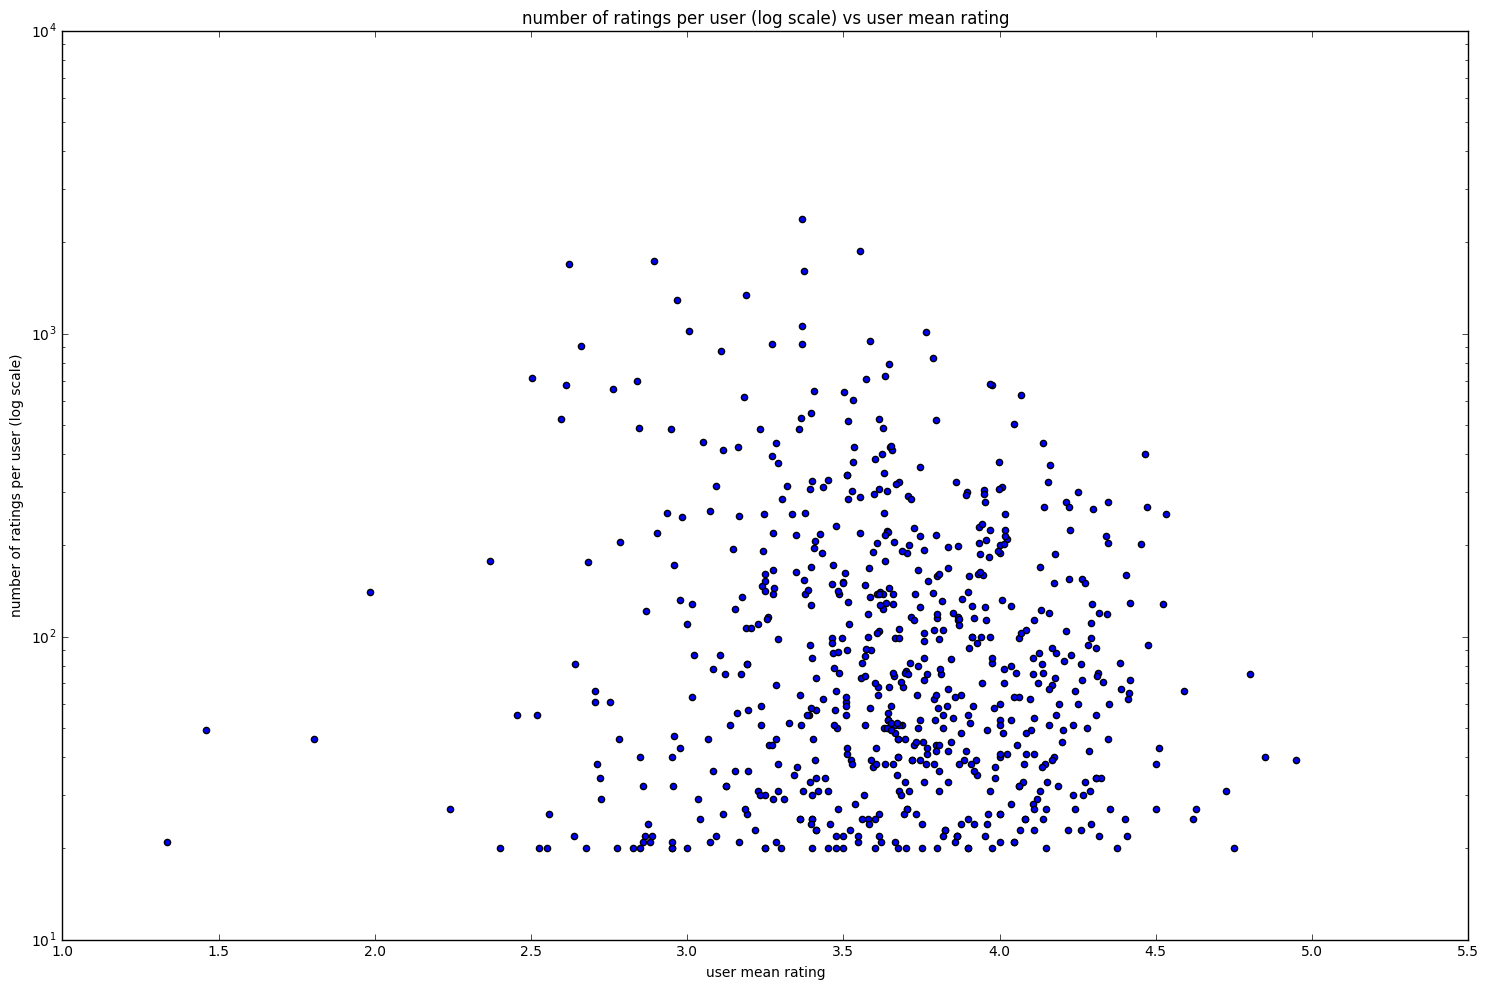

In [17]:
def explore_user_num_ratings_vs_mean_rating(dataset):
    ratings_df = dataset.ratings_df
    user_ratings = ratings_df.groupby('userId')['rating']

    user_agg = user_ratings.agg({'mean_rating': np.mean, 'count': 'count'})

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.scatter(user_agg['mean_rating'], user_agg['count'])

    ax.set_yscale('log')
    ax.set_xlabel('user mean rating')
    ax.set_ylabel('number of ratings per user (log scale)')
    ax.set_title('number of ratings per user (log scale) vs user mean rating')

    plt.tight_layout()
    plt.show()

    
explore_user_num_ratings_vs_mean_rating(dataset)

We used a log scale for numer of ratings to get less skewed distribution.

We can see that the more ratings we have for a user, the closer they get to the "middle" area (3.0-3.5).

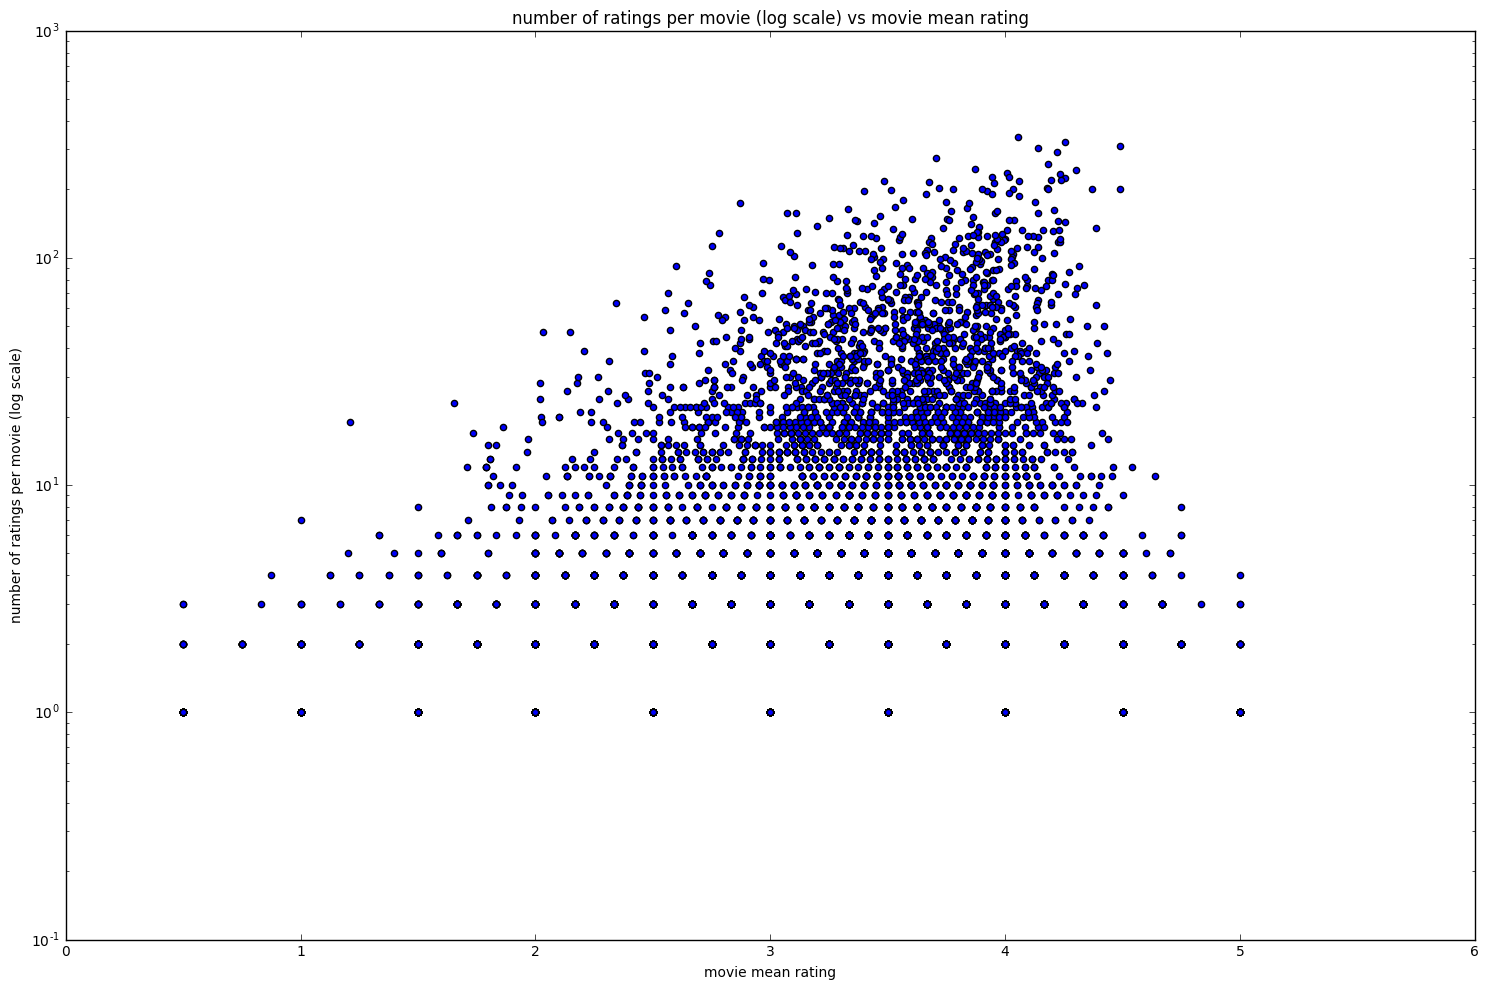

In [20]:
def explore_movie_num_ratings_vs_mean_rating(dataset):
    ratings_df = dataset.ratings_df
    movie_ratings = ratings_df.groupby('movieId')['rating']

    movie_agg = movie_ratings.agg({'mean_rating': np.mean, 'count': 'count'})

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.scatter(movie_agg['mean_rating'], movie_agg['count'])

    ax.set_yscale('log')
    ax.set_xlabel('movie mean rating')
    ax.set_ylabel('number of ratings per movie (log scale)')
    ax.set_title('number of ratings per movie (log scale) vs movie mean rating')

    plt.tight_layout()
    plt.show()

    
explore_movie_num_ratings_vs_mean_rating(dataset)

We can notice that with the increased number of ratings the movie mean rating tend to go to the right (higher rating).

We can do jittering for smaller number of ratings to show that they represent a lot of ratings.

The range of review dates, min: 1995-01-09 06:46:49, max: 2016-10-16 13:57:24


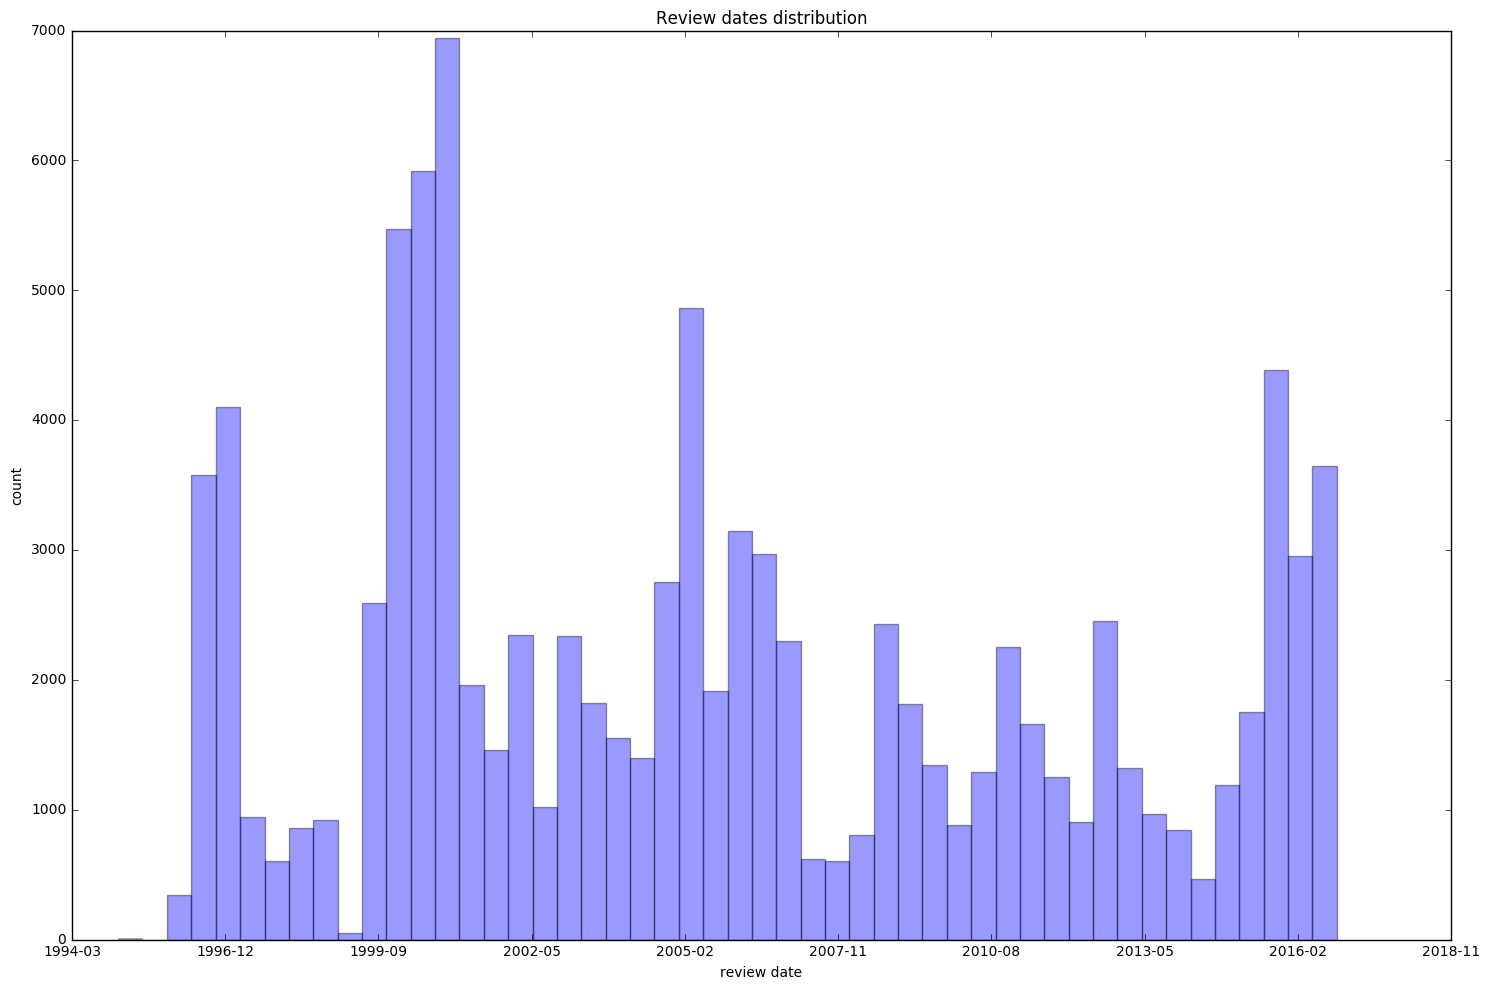

In [37]:
def explore_review_dates(dataset):
    ratings_df = dataset.ratings_df
    dates = ratings_df['timestamp']

    mpl_dates = mdates.date2num(dates.astype(datetime))

    print 'The range of review dates, min: %s, max: %s' % (np.min(dates), np.max(dates))

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(mpl_dates, bins=50, alpha=0.4)

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    ax.set_xlabel('review date')
    ax.set_ylabel('count')
    ax.set_title('Review dates distribution')

    plt.tight_layout()
    plt.show()

    
explore_review_dates(dataset)

Number of genres:  19
Genres:  ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
Maximum genres per movie:  10
Mean genres per movie: 2.23
Minimum genres per movie:  0
Number of movies with zero genres:  18


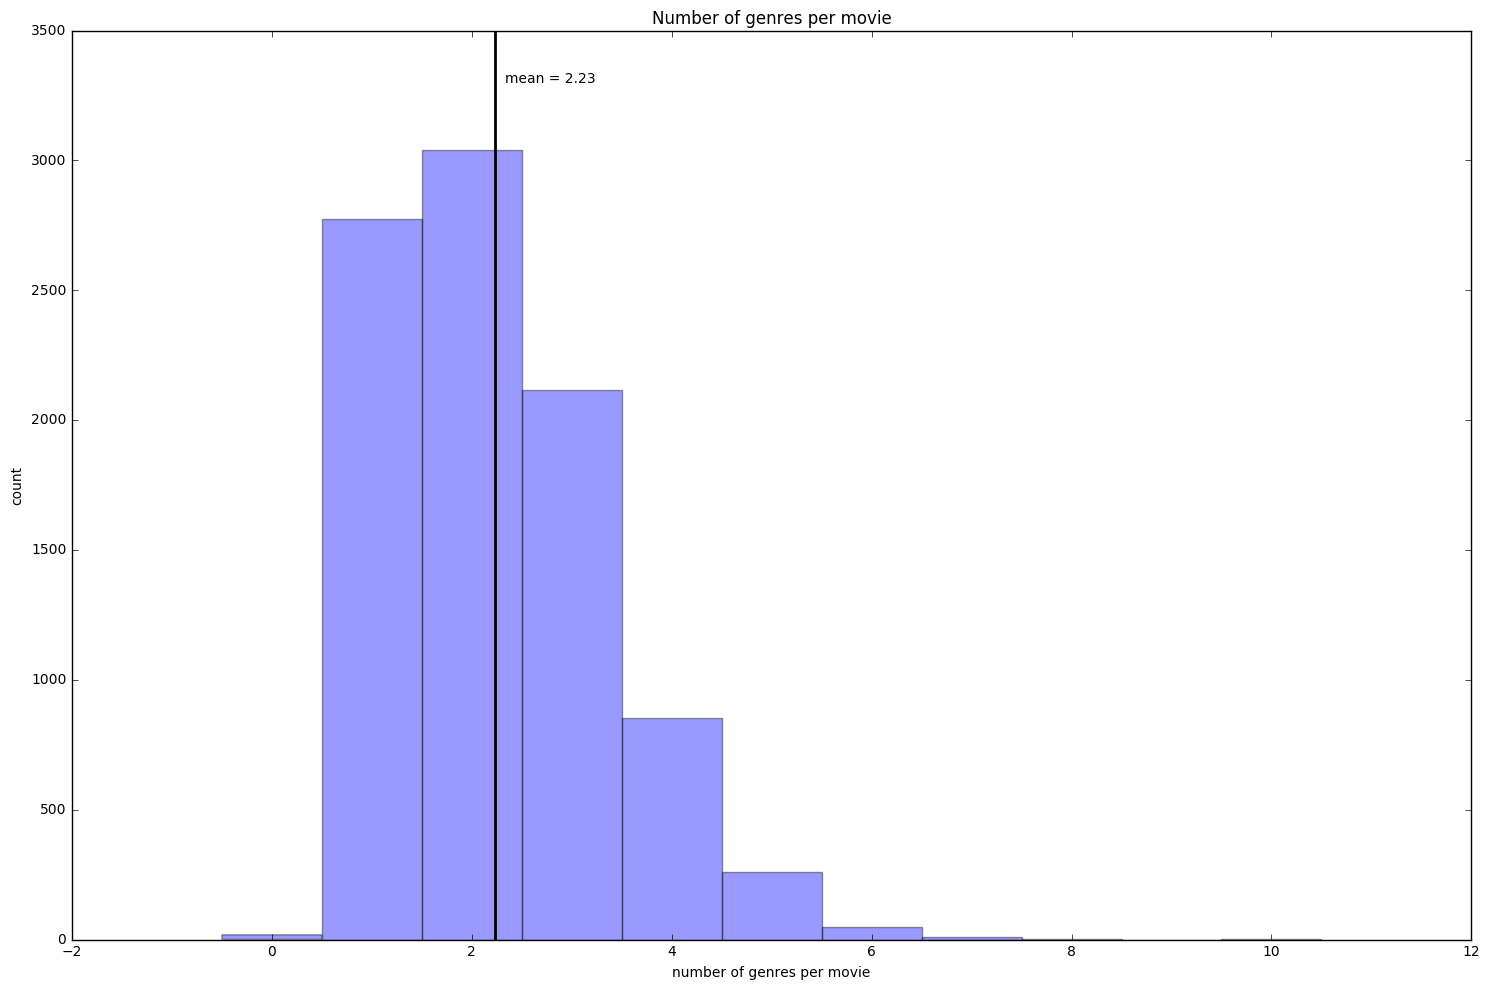

In [39]:
def get_genre_list(genre):
    if genre == '(no genres listed)':
        return []
    return genre.split('|')


def explore_num_genres_per_movie(dataset):
    movies_df = dataset.movies_df
    genres = movies_df['genres']

    genre_list = []
    num_genres_per_movie = []
    for genre in genres:
        movie_genres = get_genre_list(genre)
        genre_list.extend(movie_genres)
        num_genres_per_movie.append(len(movie_genres))

    genre_set = set(genre_list)
    print 'Number of genres: ', len(genre_set)
    print 'Genres: ', sorted(genre_set)

    print 'Maximum genres per movie: ', np.max(num_genres_per_movie)
    mean = np.mean(num_genres_per_movie)
    print 'Mean genres per movie: %.2f' % mean
    print 'Minimum genres per movie: ', np.min(num_genres_per_movie)

    counter = Counter(num_genres_per_movie)

    print 'Number of movies with zero genres: ', counter[0]

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    ax.hist(num_genres_per_movie, bins=np.arange(-0.5, 11.0, step=1.0), alpha=0.4)

    ax.axvline(x=mean, linewidth=2, color='k')
    plt.text(mean + 0.1, 3300, 'mean = %.2f' % mean)

    ax.set_xlabel('number of genres per movie')
    ax.set_ylabel('count')
    ax.set_title('Number of genres per movie')

    plt.tight_layout()
    plt.show()

    
explore_num_genres_per_movie(dataset)

Number of movies per genre:
Drama        4,365
Comedy       3,315
Thriller     1,729
Romance      1,545
Action       1,545
Adventure    1,117
Crime        1,100
Horror         877
Sci-Fi         792
Fantasy        654
Children       583
Mystery        543
Documentary    495
Animation      447
Musical        394
War            367
Western        168
IMAX           153
Film-Noir      133


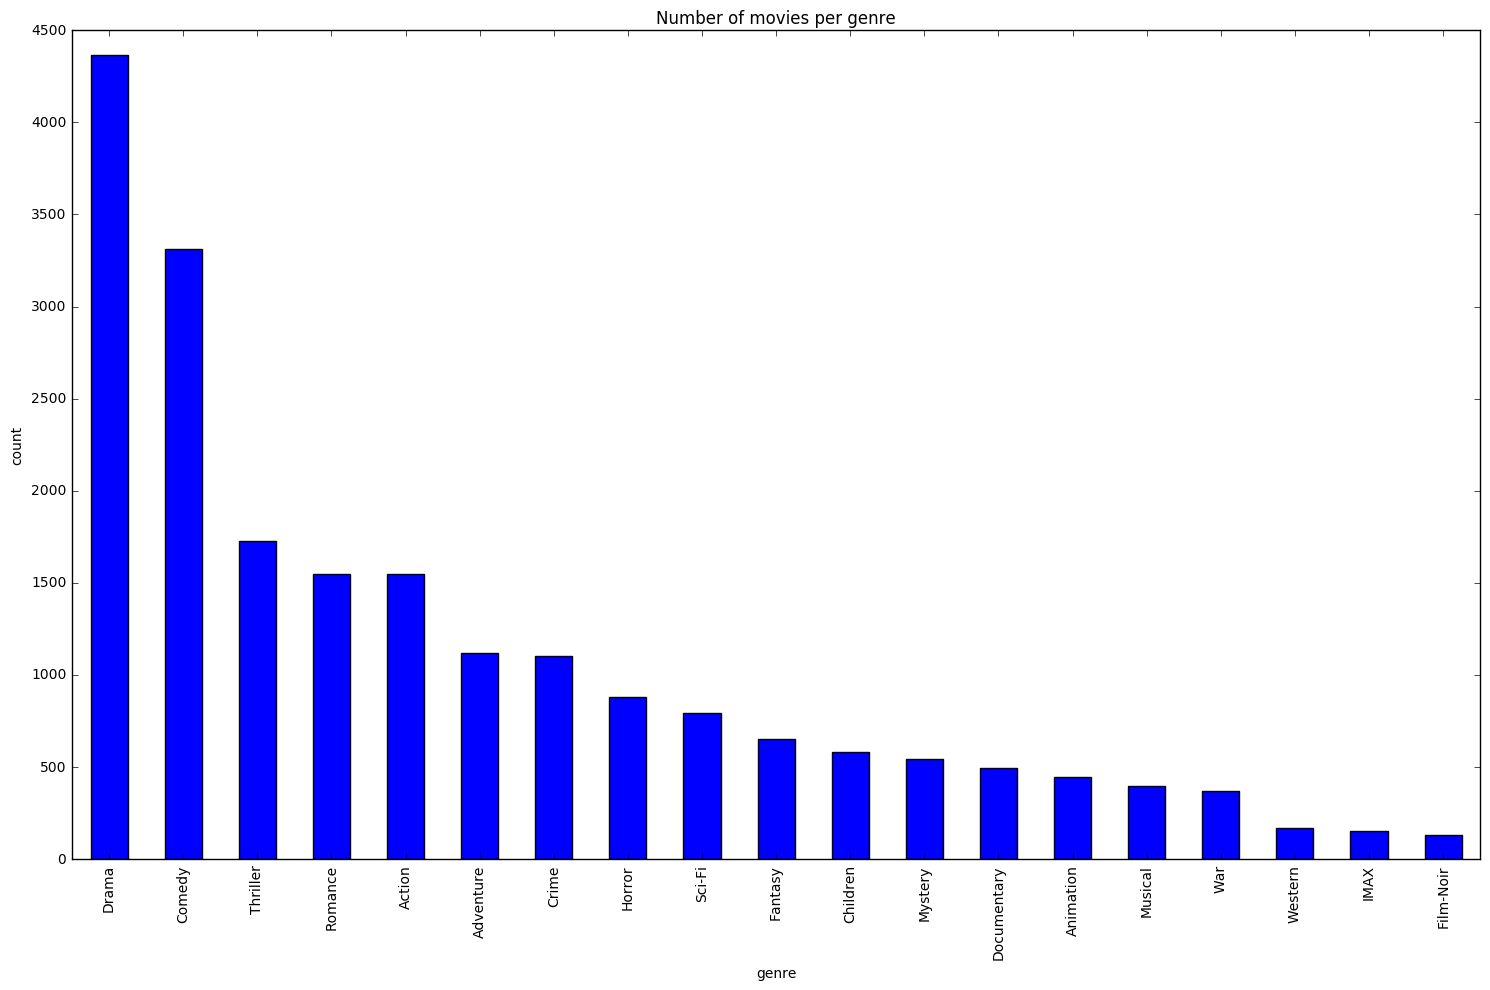

In [45]:
def explore_num_movies_per_genre(dataset):
    movies_df = dataset.movies_df
    genres = movies_df['genres']

    genre_dict = defaultdict(int)
    for movie_index, genre in enumerate(genres):
        genres = get_genre_list(genre)
        for g in genres:
            genre_dict[g] += 1

    sorted_genres = sorted(genre_dict.items(), key=operator.itemgetter(1), reverse=True)

    print 'Number of movies per genre:'
    for genre in sorted_genres:
        print '{:12} {:5,}'.format(genre[0], genre[1])

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    # ax.hist(num_genres_per_movie, bins=np.arange(-0.5, 11.0, step=1.0), alpha=0.4)

    genre_series = pd.Series([g[1] for g in sorted_genres], index=[g[0] for g in sorted_genres])

    genre_series.plot(kind='bar', ax=ax)

    ax.set_xlabel('genre')
    ax.set_ylabel('count')
    ax.set_title('Number of movies per genre')

    plt.tight_layout()
    plt.show()

    
explore_num_movies_per_genre(dataset)

Number of ratings per genre:
Drama        44,752
Comedy       38,026
Action       27,056
Thriller     25,240
Adventure    22,017
Romance      19,336
Crime        16,266
Sci-Fi       15,365
Fantasy      10,657
Children      8,680
Mystery       7,625
Horror        6,790
Animation     6,170
War           5,025
Musical       4,722
IMAX          3,156
Western       1,912
Documentary   1,564
Film-Noir     1,140


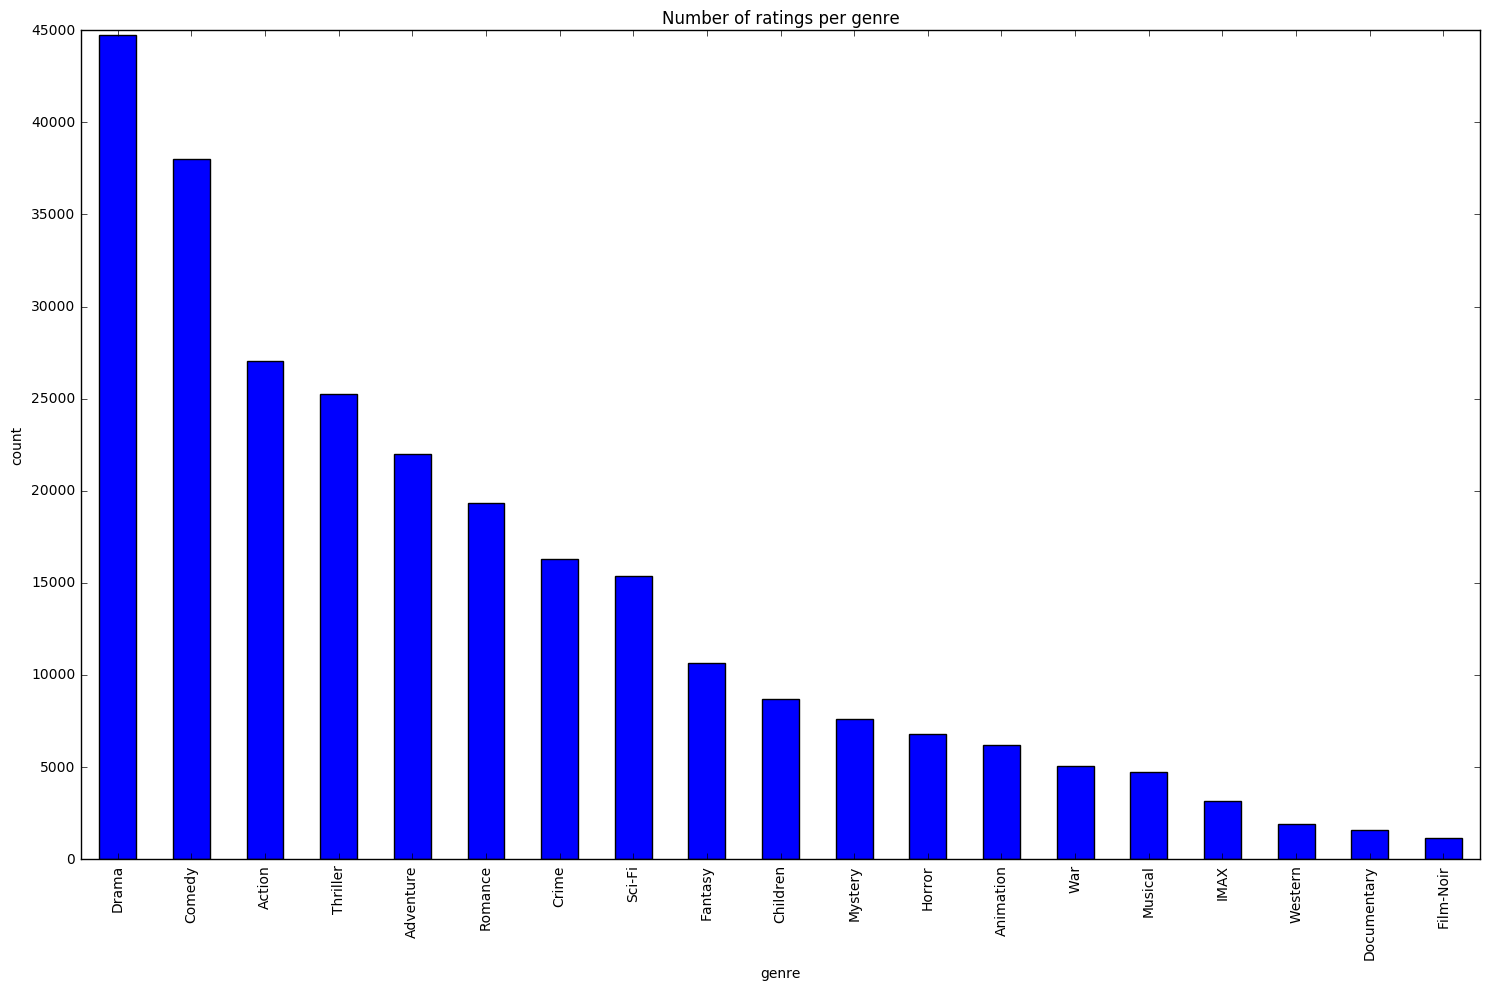

In [46]:
def explore_genre_mean_ratings(dataset):
    ratings_df = dataset.ratings_df
    movies_df = dataset.movies_df

    merged_ratings_df = ratings_df.merge(movies_df)
    # genres = movies_df['genres']

    genre_dict = defaultdict(list)
    for index, row in merged_ratings_df.iterrows():
        genre_str = row['genres']
        rating = row['rating']
        genre_list = get_genre_list(genre_str)
        for g in genre_list:
            genre_dict[g].append(rating)

    num_ratings_genre_dict = {key: len(value) for key, value in genre_dict.iteritems()}
    sorted_num_ratings_genre_dict = sorted(num_ratings_genre_dict.items(), key=operator.itemgetter(1), reverse=True)

    print 'Number of ratings per genre:'
    for genre in sorted_num_ratings_genre_dict:
        print '{:12} {:6,}'.format(genre[0], genre[1])

    _, ax = plt.subplots(1, 1, figsize=get_fig_size())

    genre_series = pd.Series([g[1] for g in sorted_num_ratings_genre_dict],
                             index=[g[0] for g in sorted_num_ratings_genre_dict])

    genre_series.plot(kind='bar', ax=ax)

    ax.set_xlabel('genre')
    ax.set_ylabel('count')
    ax.set_title('Number of ratings per genre')

    plt.tight_layout()
    plt.show()

    
explore_genre_mean_ratings(dataset)